<a href="https://colab.research.google.com/github/yunuserbas/Projet_2_WCS/blob/main/Question_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question

**Y a-t-il une corrélation entre le délai (date de livraison - date de commande) et le score de la critique ?**

In [ ]:
# Importer les données.

import requests
import zipfile
import sqlite3
import pandas as pd

# Ici, nous téléchargeons le fichier de GitHub 
r = requests.get('https://github.com/murpi/olist/blob/master/olist.sqlite.zip?raw=true')
open('olist.sqlite.zip', 'wb').write(r.content)

# Puis on le décompresse
with zipfile.ZipFile("olist.sqlite.zip","r") as zip_ref:
    zip_ref.extractall()

# Nous nous connectons à la base de données
conn = sqlite3.connect('olist.sqlite')

In [ ]:
# Voici une requête spécifique pour lister le nom des tables
cursor = conn.cursor()
schema = cursor.execute("SELECT * FROM sqlite_master where type='table'").fetchall()
pd.DataFrame(schema, columns = ["type", "name", "table_name", "rootpage", "SQL"])

,type,name,table_name,rootpage,SQL
0,table,customers_dataset,customers_dataset,2,"CREATE TABLE ""customers_dataset"" (\n\t""custome..."
1,table,product_category_name_translation,product_category_name_translation,2236,"CREATE TABLE ""product_category_name_translatio..."
2,table,sellers_dataset,sellers_dataset,2237,"CREATE TABLE ""sellers_dataset"" (\n\t""seller_id..."
3,table,products_dataset,products_dataset,2282,"CREATE TABLE ""products_dataset"" (\n\t""product_..."
4,table,orders_dataset,orders_dataset,2859,"CREATE TABLE ""orders_dataset"" (\n\t""order_id""\..."
5,table,order_reviews_dataset,order_reviews_dataset,7391,"CREATE TABLE ""order_reviews_dataset"" (\n\t""rev..."
6,table,order_payments_dataset,order_payments_dataset,11053,"CREATE TABLE ""order_payments_dataset"" (\n\t""or..."
7,table,order_items_dataset,order_items_dataset,12645,"CREATE TABLE ""order_items_dataset"" (\n\t""order..."
8,table,geolocation_dataset,geolocation_dataset,16680,"CREATE TABLE ""geolocation_dataset"" (\n\t""geolo..."


In [ ]:
order_reviews_dataset_sql = pd.read_sql("select * from order_reviews_dataset ", conn)
order_items_dataset_sql = pd.read_sql("select * from order_items_dataset	", conn)
orders_dataset_sql = pd.read_sql("select * from orders_dataset	", conn)



tbd = pd.merge(order_items_dataset_sql, order_reviews_dataset_sql, how="left", on='order_id')
tbd = pd.merge(tbd, orders_dataset_sql, how="left", on='order_id')
tbd

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,None,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,None,None,2017-05-13 00:00:00,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,None,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4.0,None,None,2018-08-15 00:00:00,2018-08-15 16:39:01,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,None,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113309,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,9185f849f32d82e216a4e025e0c50f5c,5.0,None,None,2018-05-11 00:00:00,2018-05-14 12:53:47,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
113310,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,be803f6a93d64719fd685c1cc610918a,5.0,None,None,2018-07-24 00:00:00,2018-07-25 09:25:29,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
113311,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,dbdd81cd59a1a9f94a10a990b4d48dce,5.0,None,None,2017-10-29 00:00:00,2017-10-29 21:33:52,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
113312,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,fba117c9ac40d41ca7be54741f471303,5.0,None,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [ ]:
# Convertir tous les types de date de "object" dans la table en "datatime".

tbd["review_answer_timestamp"] = pd.to_datetime(tbd["review_answer_timestamp"])
tbd["order_delivered_customer_date"] = pd.to_datetime(tbd["order_delivered_customer_date"])
tbd["order_estimated_delivery_date"] = pd.to_datetime(tbd["order_estimated_delivery_date"])
tbd["order_purchase_timestamp"] = pd.to_datetime(tbd["order_purchase_timestamp"])
tbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113314 entries, 0 to 113313
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113314 non-null  object        
 1   order_item_id                  113314 non-null  int64         
 2   product_id                     113314 non-null  object        
 3   seller_id                      113314 non-null  object        
 4   shipping_limit_date            113314 non-null  object        
 5   price                          113314 non-null  float64       
 6   freight_value                  113314 non-null  float64       
 7   review_id                      112372 non-null  object        
 8   review_score                   112372 non-null  float64       
 9   review_comment_title           13432 non-null   object        
 10  review_comment_message         47614 non-null   object        
 11  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Calculs délais >> Revue/Livraison conso puis Revue/Livraison estimée, Livivraison réel/estimé et delai livraison
tbd["review_dc"] = (tbd["review_answer_timestamp"]-tbd["order_delivered_customer_date"]) / np.timedelta64(1, 'D')
tbd["review_de"] = (tbd["review_answer_timestamp"]-tbd["order_estimated_delivery_date"]) / np.timedelta64(1, 'D')
tbd["reel_estim"] = (tbd["order_delivered_customer_date"]-tbd["order_estimated_delivery_date"]) / np.timedelta64(1, 'D')
tbd["tps_livraison"] = (tbd["order_delivered_customer_date"]-tbd["order_purchase_timestamp"])/ np.timedelta64(1, 'D')
tbd.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_dc,review_de,reel_estim,tps_livraison
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,None,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1.467535,-6.543715,-8.011250,7.614421
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,None,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2.812373,0.482095,-2.330278,16.216181
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,None,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1.116146,-12.328808,-13.444954,7.948437
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4.0,None,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1.129421,-4.306238,-5.435660,6.147269
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,None,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1.758657,-13.545150,-15.303808,25.114352


In [ ]:
tbd['review_dc'].value_counts(normalize = True)*100

-1.155498    0.019089
 6.891435    0.018180
 1.165197    0.015453
 2.268414    0.013635
 5.746308    0.013635
               ...   
 1.238854    0.000909
 6.277604    0.000909
 3.551609    0.000909
 3.373704    0.000909
 1.600289    0.000909
Name: review_dc, Length: 79835, dtype: float64

In [ ]:
tbd_post_l = tbd[tbd['review_dc'] >= 0]
tbd_post_l.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_dc,review_de,reel_estim,tps_livraison
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,None,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1.467535,-6.543715,-8.011250,7.614421
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,None,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2.812373,0.482095,-2.330278,16.216181
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,None,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1.116146,-12.328808,-13.444954,7.948437
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4.0,None,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1.129421,-4.306238,-5.435660,6.147269
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,None,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1.758657,-13.545150,-15.303808,25.114352


In [ ]:
tbd_post_le = tbd[tbd['review_de'] >= 0]
tbd_post_le.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_dc,review_de,reel_estim,tps_livraison
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,None,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2.812373,0.482095,-2.330278,16.216181
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,67b1ab8f3ec19d5a90f153f21757d3a1,1.0,None,...,delivered,2018-03-19 18:40:33,2018-03-20 18:35:21,2018-03-28 00:37:42,2018-03-29 18:17:31,2018-03-29,3.273958,4.036123,0.762164,9.984005
11,00063b381e2406b52ad429470734ebd5,1,f177554ea93259a5b282f24e33f65ab6,8602a61d680a10a82cceeeda0d99ea3d,2018-07-31 17:30:39,45.00,12.98,5595c192e3c1566ab4e7a2748b8ed297,5.0,None,...,delivered,2018-07-27 17:21:27,2018-07-27 18:00:06,2018-07-30 14:52:00,2018-08-07 13:56:52,2018-08-07,1.427523,2.008681,0.581157,10.857928
17,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77,00800678dcf28b0ea0caef2147b6945d,1.0,produto não entregue,...,delivered,2018-05-11 20:33:38,2018-05-11 20:57:03,2018-05-16 14:26:00,2018-05-18 16:46:31,2018-05-22,3.754086,0.453056,-3.301030,6.842280
21,000e906b789b55f64edcb1f84030f90d,1,57d79905de06d8897872c551bfd09358,ea8482cd71df3c1969d7b9473ff13abc,2017-11-27 19:09:02,21.99,11.85,a5fb93d6a9e707bd84c07da74e8d79fd,3.0,None,...,delivered,2017-11-21 18:54:23,2017-11-21 19:09:02,2017-11-22 20:46:54,2017-12-09 17:27:23,2017-12-07,1.685995,4.413345,2.727350,17.939583


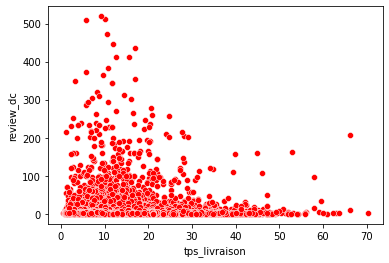

In [ ]:
sns.scatterplot(data = tbd_post_l,
                x = "tps_livraison", 
                y = "review_dc", color = "red")

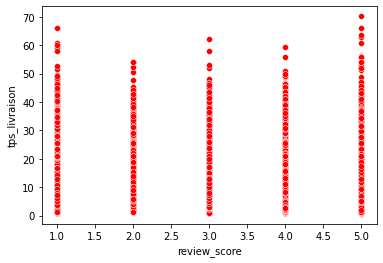

In [ ]:
sns.scatterplot(data = tbd_post_l,
                x = "review_score", 
                y = "tps_livraison", color = "red")

In [ ]:
tbd['review_dc'].corr(tbd['review_score'])

0.09443910932640022

In [ ]:
tbd['review_de'].corr(tbd['review_score'])

-0.1357074442743706

In [ ]:
tbd['reel_estim'].corr(tbd['review_score'])

-0.2287126093345538

In [ ]:
tbd['tps_livraison'].corr(tbd['review_score'])

-0.3041015468497449

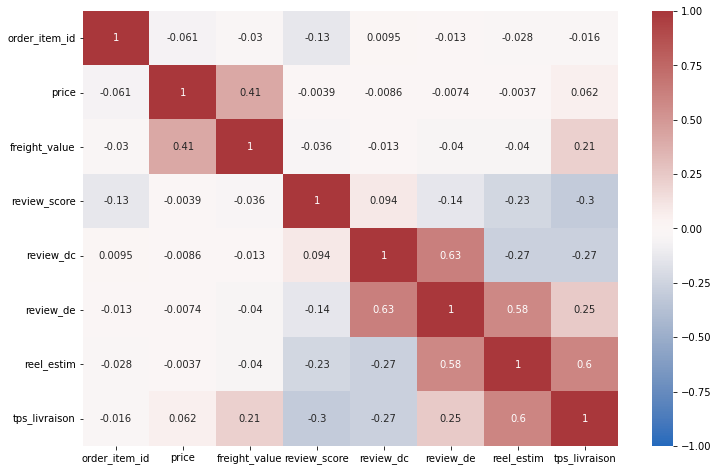

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(tbd.corr(), cmap = sns.color_palette("vlag", as_cmap=True), center = 0, annot = True, vmin = -1, vmax=1)

In [ ]:
tbd["order_purchase_timestamp"] = tbd["order_purchase_timestamp"].dt.strftime('%Y/%m/%d')
tbd["order_purchase_timestamp"] = pd.to_datetime(tbd["order_purchase_timestamp"])
tbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113314 entries, 0 to 113313
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113314 non-null  object        
 1   order_item_id                  113314 non-null  int64         
 2   product_id                     113314 non-null  object        
 3   seller_id                      113314 non-null  object        
 4   shipping_limit_date            113314 non-null  object        
 5   price                          113314 non-null  float64       
 6   freight_value                  113314 non-null  float64       
 7   review_id                      112372 non-null  object        
 8   review_score                   112372 non-null  float64       
 9   review_comment_title           13432 non-null   object        
 10  review_comment_message         47614 non-null   object        
 11  

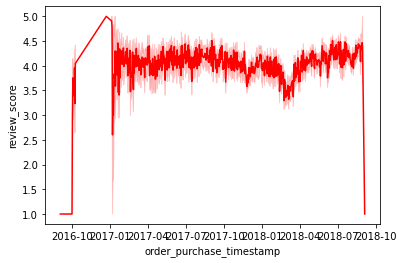

In [ ]:
sns.lineplot(data = tbd,
                x = "order_purchase_timestamp", 
                y = "review_score", color = "red")

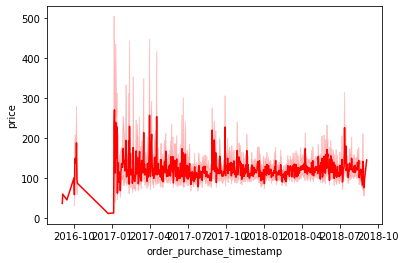

In [ ]:
sns.lineplot(data = tbd,
                x = "order_purchase_timestamp", 
                y = "price", color = "red")

In [ ]:
sellers = pd.read_sql("select * from sellers_dataset	", conn)
product = pd.read_sql("select * from products_dataset", conn)

In [ ]:
tbdc = pd.merge(tbd,sellers, how="left", on='seller_id')
tbdc = pd.merge(tbd,product, how="left", on='product_id')
tbdc

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,...,reel_estim,tps_livraison,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,None,...,-8.011250,7.614421,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,None,...,-2.330278,16.216181,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,None,...,-13.444954,7.948437,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4.0,None,...,-5.435660,6.147269,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,None,...,-15.303808,25.114352,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113309,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,9185f849f32d82e216a4e025e0c50f5c,5.0,None,...,-7.043981,17.374699,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
113310,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,be803f6a93d64719fd685c1cc610918a,5.0,None,...,-8.144502,9.420243,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
113311,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,dbdd81cd59a1a9f94a10a990b4d48dce,5.0,None,...,-12.484468,4.801690,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
113312,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,fba117c9ac40d41ca7be54741f471303,5.0,None,...,-8.083565,1.956030,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [ ]:
tbdc['debut'] = tbdc['order_purchase_timestamp']
tbdc['fin'] = tbdc['order_purchase_timestamp']
tbdc

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,debut,fin
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5.0,None,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,2017-09-13,2017-09-13
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4.0,None,...,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,2017-04-26,2017-04-26
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5.0,None,...,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,2018-01-14,2018-01-14
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4.0,None,...,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,2018-08-08,2018-08-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5.0,None,...,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,2017-02-04,2017-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113309,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,9185f849f32d82e216a4e025e0c50f5c,5.0,None,...,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,2018-04-23,2018-04-23
113310,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,be803f6a93d64719fd685c1cc610918a,5.0,None,...,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,2018-07-14,2018-07-14
113311,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,dbdd81cd59a1a9f94a10a990b4d48dce,5.0,None,...,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,2017-10-23,2017-10-23
113312,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,fba117c9ac40d41ca7be54741f471303,5.0,None,...,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,2017-08-14,2017-08-14


In [ ]:
tbdc.pivot_table(index ='seller_id', values =['debut','fin'], aggfunc= {'debut': 'min', 'fin': 'max'})

,debut,fin
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,2017-09-26,2017-10-18
001cca7ae9ae17fb1caed9dfb1094831,2017-02-04,2018-07-12
001e6ad469a905060d959994f1b41e4f,2018-08-07,2018-08-07
002100f778ceb8431b7a1020ff7ab48f,2017-09-14,2018-04-12
003554e2dce176b5555353e4f3555ac8,2017-12-15,2017-12-15
...,...,...
ffcfefa19b08742c5d315f2791395ee5,2018-06-23,2018-06-23
ffdd9f82b9a447f6f8d4b91554cc7dd3,2017-03-05,2018-08-19
ffeee66ac5d5a62fe688b9d26f83f534,2017-09-30,2018-05-14
